In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import scipy.stats as st
import pprint as pprint
import hvplot.pandas

In [68]:
figure_count = 0

def save_figure(fig_count, path, filename):
    fig_count = fig_count + 1
    figure_code = f"d{fig_count:02d}_"
    full_path = f"{path}/{figure_code}{filename}"
    print(f"Saving to: {full_path}")
    plt.savefig(full_path)
    return fig_count

In [69]:
# Read home value data

data_path_home_value = "Data/home_value_interpolated.csv"
home_value_df = pd.read_csv(data_path_home_value, index_col=0)
home_value_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Interpolated
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,161415.797093,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,...,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255,NaN
2004-02,2004,2,162463.870016,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,...,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088,NaN
2004-03,2004,3,163620.161222,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,...,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142,NaN
2004-04,2004,4,164912.797589,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,...,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633,NaN
2004-05,2004,5,166368.365614,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,...,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502,NaN


In [70]:
# Read median income data

data_path_median_income = "Data/median_income_formatted.csv"
median_income_df = pd.read_csv(data_path_median_income, index_col=0)
median_income_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005-01,2005,1,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006-01,2006,1,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007-01,2007,1,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008-01,2008,1,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [71]:
# Read state data
data_path_states = "Data/states.csv"
states_df = pd.read_csv(data_path_states, index_col=0)
states_df.head()

,Code,Lat,Lon
State,,,
Alabama,AL,32.806671,-86.791130
Alaska,AK,61.370716,-152.404419
Arizona,AZ,33.729759,-111.431221
Arkansas,AR,34.969704,-92.373123
California,CA,36.116203,-119.681564


In [72]:
# List home_value_df columns, numbered for reference
hv_list = home_value_df.columns.to_list()
hv_colnum = range(0, len(hv_list))
hv_column_pair = pd.DataFrame(zip(hv_colnum, hv_list))
print(hv_column_pair[1])


0                     Year
1                    Month
2            United States
3                  Alabama
4                   Alaska
5                  Arizona
6                 Arkansas
7               California
8                 Colorado
9              Connecticut
10                Delaware
11    District of Columbia
12                 Florida
13                 Georgia
14                  Hawaii
15                   Idaho
16                Illinois
17                 Indiana
18                    Iowa
19                  Kansas
20                Kentucky
21               Louisiana
22                   Maine
23                Maryland
24           Massachusetts
25                Michigan
26               Minnesota
27             Mississippi
28                Missouri
29                 Montana
30                Nebraska
31                  Nevada
32           New Hampshire
33              New Jersey
34              New Mexico
35                New York
36          North Carolina
3

In [73]:
# List median_income_df columns, numbered for reference
inc_list = median_income_df.columns.to_list()
inc_colnum = range(0, len(inc_list))
inc_column_pair = pd.DataFrame(zip(inc_colnum, inc_list))
print(inc_column_pair[1])


0                     Year
1                    Month
2            United States
3                  Alabama
4                   Alaska
5                  Arizona
6                 Arkansas
7               California
8                 Colorado
9              Connecticut
10                Delaware
11    District of Columbia
12                 Florida
13                 Georgia
14                  Hawaii
15                   Idaho
16                Illinois
17                 Indiana
18                    Iowa
19                  Kansas
20                Kentucky
21               Louisiana
22                   Maine
23                Maryland
24           Massachusetts
25                Michigan
26               Minnesota
27             Mississippi
28                Missouri
29                 Montana
30                Nebraska
31                  Nevada
32           New Hampshire
33              New Jersey
34              New Mexico
35                New York
36          North Carolina
3

In [74]:
start_column = hv_column_pair[hv_column_pair == 'Alabama'].first_valid_index()
end_column = hv_column_pair[hv_column_pair == 'Wyoming'].first_valid_index() + 1
print(f"Start Column = {start_column}\nEnd Column = {end_column}")

Start Column = 3
End Column = 54


Saving to: Images/d01_Home_Values_2004-2023.png


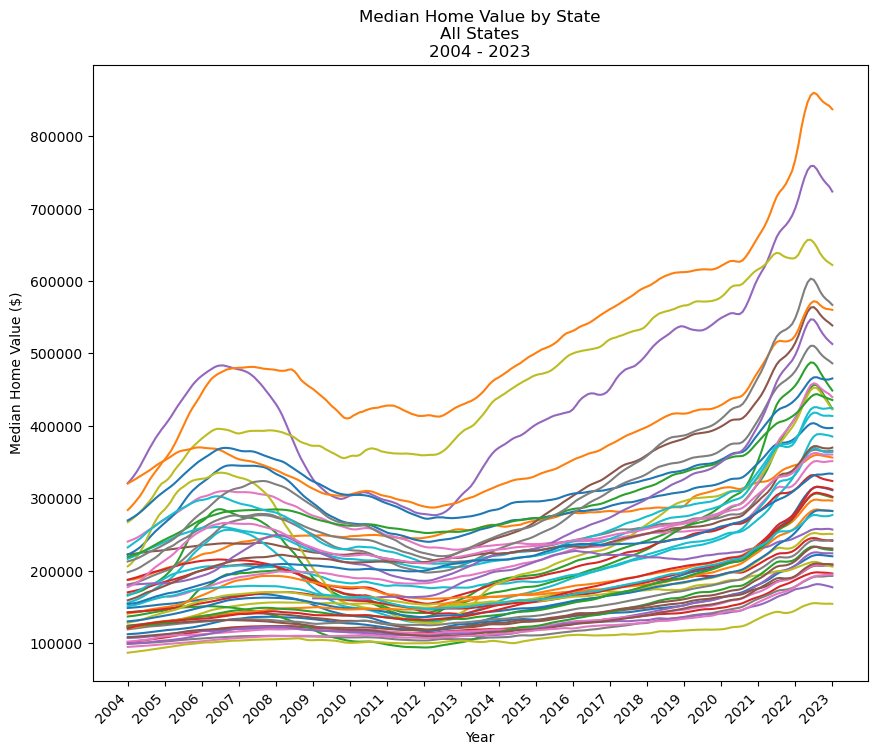

In [75]:
plt.figure(figsize=(10,8))
#home_value_df = home_value_df.set_index('Date')
plt.plot(home_value_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Home Value by State\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
# plt.savefig("Images/Home_Values_2004-2023.png")
figure_count = save_figure(figure_count, "Images","Home_Values_2004-2023.png")
plt.show();

Saving to: Images/d02_Median_Income_2004-2023.png


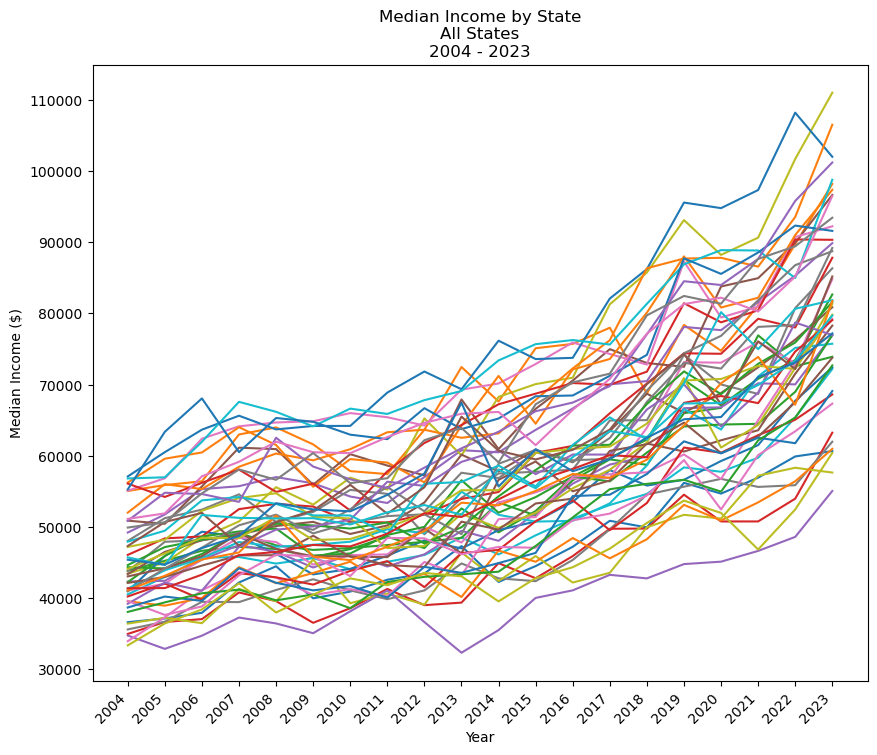

In [76]:
plt.figure(figsize=(10,8))
#home_value_df = home_value_df.set_index('Date')
plt.plot(median_income_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(median_income_df), 1)
fig_labels = median_income_df['Year'][::1]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Income by State\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Income ($)")
#plt.savefig("Images/Median_Income_2004-2023.png")
figure_count = save_figure(figure_count, "Images","Median_Income_2004-2023.png")
plt.show();

In [77]:
# Get the top and bottom 5 states in median home values, as of the end time period
last_hv_data_point_df = home_value_df.iloc[-1,start_column:end_column]
top_5_hv_srs = last_hv_data_point_df.sort_values(ascending=False)[0:5]
top_5_hv_list = top_5_hv_srs.index
print(f"Top 5: {top_5_hv_list}")

bottom_5_hv_srs = last_hv_data_point_df.sort_values(ascending=True)[0:5]
bottom_5_hv_list = bottom_5_hv_srs.index
print(f"Bottom 5: {bottom_5_hv_list}")

Top 5: Index(['Hawaii', 'California', 'District of Columbia', 'Washington',
       'Massachusetts'],
      dtype='object')
Bottom 5: Index(['West Virginia', 'Mississippi', 'Kentucky', 'Oklahoma', 'Arkansas'], dtype='object')


Saving to: Images/d03_Home_Values_Top_Bottom_2004-2023.png


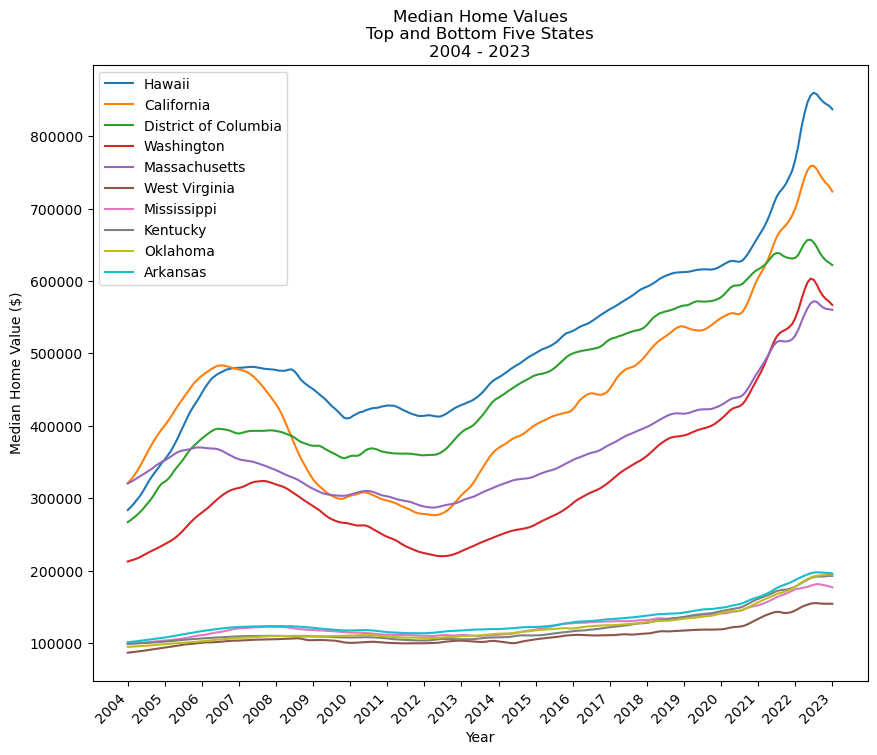

In [78]:
graph_list_hv = top_5_hv_list.append(bottom_5_hv_list)

plt.figure(figsize=(10,8))
plt.plot(home_value_df.loc[:,graph_list_hv])
#fig_01a = plt.plot(hv2_df.loc[:,top_5_list])
#fig_01b = plt.plot(hv2_df.loc[:,bottom_5_list])
fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend(graph_list_hv)
#plt.legend([fig_01a, fig_01b], ['Top 5', 'Bottom 5'])
plt.title(f"Median Home Values\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
#plt.savefig("Images/Home_Values_Top_Bottom_2004-2023.png")
figure_count = save_figure(figure_count, "Images","Home_Values_Top_Bottom_2004-2023.png")
plt.show();

In [79]:
# Get the top and bottom 5 states in median income, as of the end time period
last_inc_data_point_df = median_income_df.iloc[-1,start_column:end_column]
top_5_inc_srs = last_inc_data_point_df.sort_values(ascending=False)[0:5]
top_5_inc_list = top_5_inc_srs.index
print(f"Top 5: {top_5_inc_list}")

bottom_5_inc_srs = last_inc_data_point_df.sort_values(ascending=True)[0:5]
bottom_5_inc_list = bottom_5_inc_srs.index
print(f"Bottom 5: {bottom_5_inc_list}")

Top 5: Index(['District of Columbia', 'Massachusetts', 'Maryland', 'Utah',
       'New Hampshire'],
      dtype='object')
Bottom 5: Index(['Mississippi', 'Louisiana', 'West Virginia', 'Alabama', 'New Mexico'], dtype='object')


Saving to: Images/d04_Median_Income_Top_Bottom_2004-2023.png


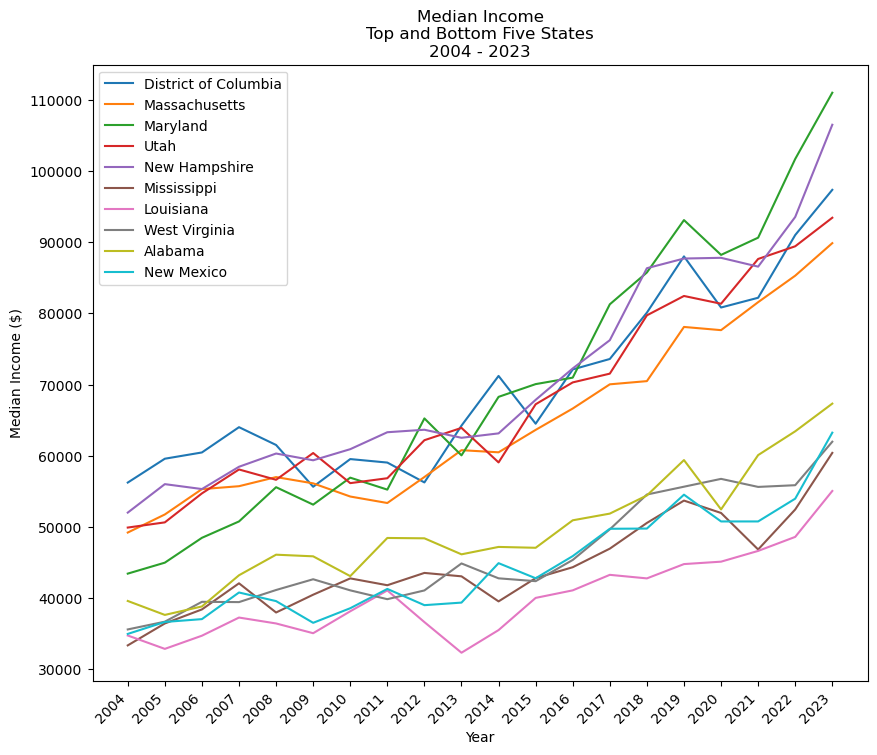

In [80]:
graph_list_inc = top_5_inc_list.append(bottom_5_inc_list)

plt.figure(figsize=(10,8))
plt.plot(median_income_df.loc[:,graph_list_hv])
fig_xticks = range(0, len(median_income_df), 1)
fig_labels = median_income_df['Year'][::1]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend(graph_list_inc)
#plt.legend([fig_01a, fig_01b], ['Top 5', 'Bottom 5'])
plt.title(f"Median Income\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.xlabel("Year")
plt.ylabel("Median Income ($)")
#plt.savefig("Images/Median_Income_Top_Bottom_2004-2023.png")
figure_count = save_figure(figure_count, "Images","Median_Income_Top_Bottom_2004-2023.png")
plt.show();

In [81]:
def graph_home_value_vs_income(state):
    
    fig01, = plt.plot(home_value_df.loc[:,state], label="Median Home Value")
    fig02, = plt.plot(median_income_df.loc[:,state], label="Median Income")
    fig_xticks = range(0, len(home_value_df), 12)
    fig_labels = home_value_df['Year'][::12]
    plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
    plt.title(f"Median Home Value and Median Income\n{state}\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
    plt.ylim((0, 900000))
    plt.xlabel("Year")
    plt.ylabel("U.S. Dollars ($)")
    plt.legend()
    #plt.show();

Saving to: Images/d05_States_HI_WV_2004-2023.png


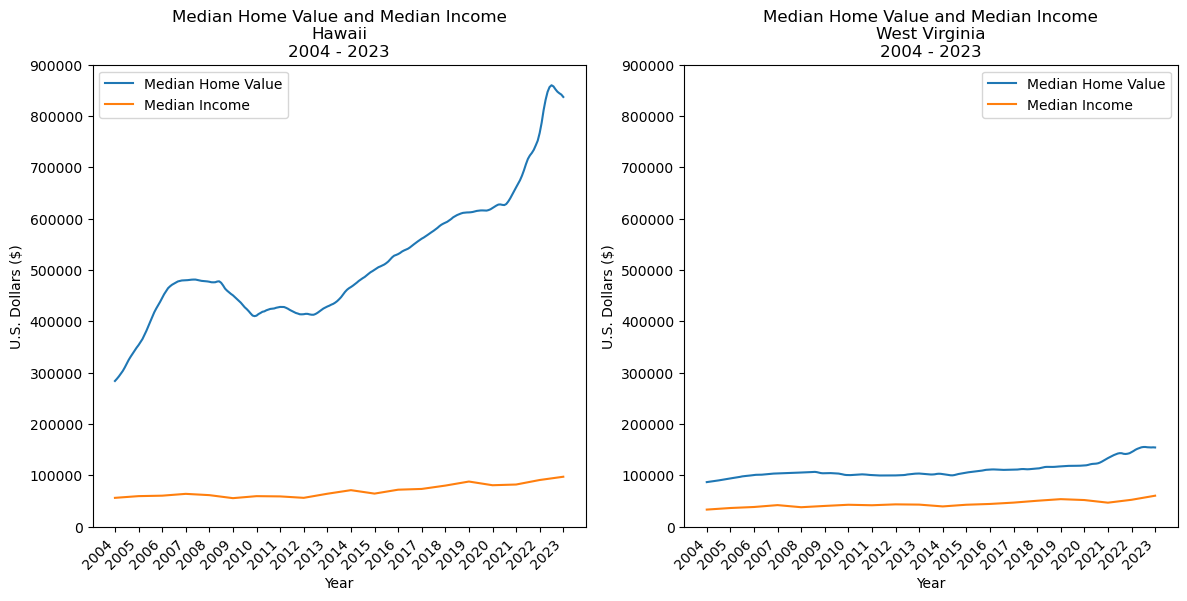

In [82]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
graph_home_value_vs_income("Hawaii")


plt.subplot(1, 2, 2)
graph_home_value_vs_income("West Virginia")

#plt.savefig("Images/States_HI_WV_2004-2023.png")
figure_count = save_figure(figure_count, "Images","States_HI_WV_2004-2023.png")

Saving to: Images/d06_States_CA_MS_2004-2023.png


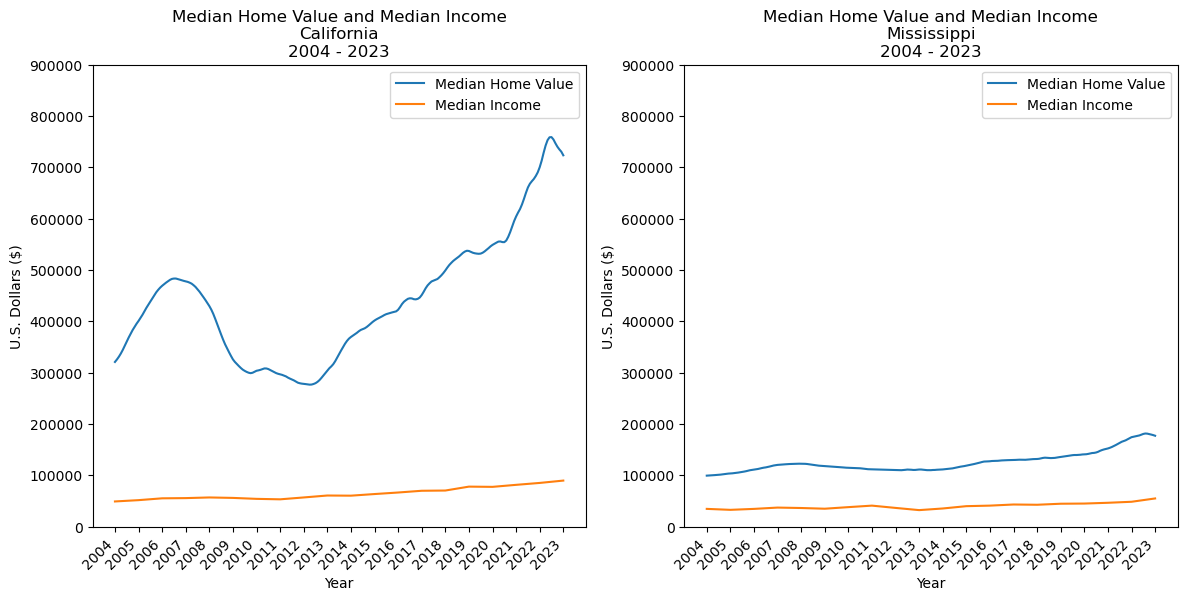

In [83]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
graph_home_value_vs_income("California")


plt.subplot(1, 2, 2)
graph_home_value_vs_income("Mississippi")

#plt.savefig("Images/States_CA_MS_2004-2023.png")
figure_count = save_figure(figure_count, "Images","States_CA_MS_2004-2023.png")

Saving to: Images/d07_States_MD_LA_2004-2023.png


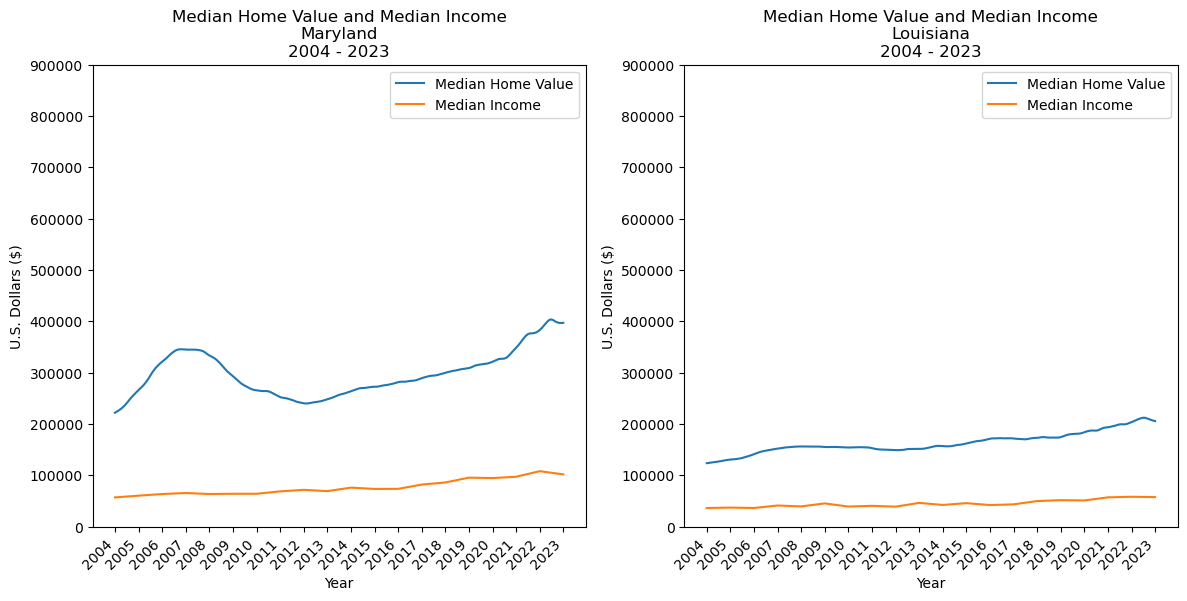

In [84]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
graph_home_value_vs_income("Maryland")


plt.subplot(1, 2, 2)
graph_home_value_vs_income("Louisiana")

#plt.savefig("Images/States_MD_LA_2004-2023.png")
figure_count = save_figure(figure_count, "Images","States_MD_LA_2004-2023.png")

In [85]:
# Define a function to create Linear Regression plots
def LinRegressPlot(x_vals, y_vals, txt_loc_tuple, txt_size=16, marker_color='#0485d1', labels=["","",""]):
    plt.scatter(x_vals, y_vals, marker='o', color=marker_color, alpha=1, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)

    #print(f"min r: {(slope * x_vals.min().min()) + intercept}")
    #print(f"max r: {(slope * x_vals.max().max()) + intercept}")
    
    r_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_vals = (slope * x_vals) + intercept
    plt.plot(x_vals, r_vals, 'r')
    plt.annotate(r_line, txt_loc_tuple, color='r', size=txt_size)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    
    return rvalue**2

Saving to: Images/d08_LinearRegression_Home_Values_Income_2004.png


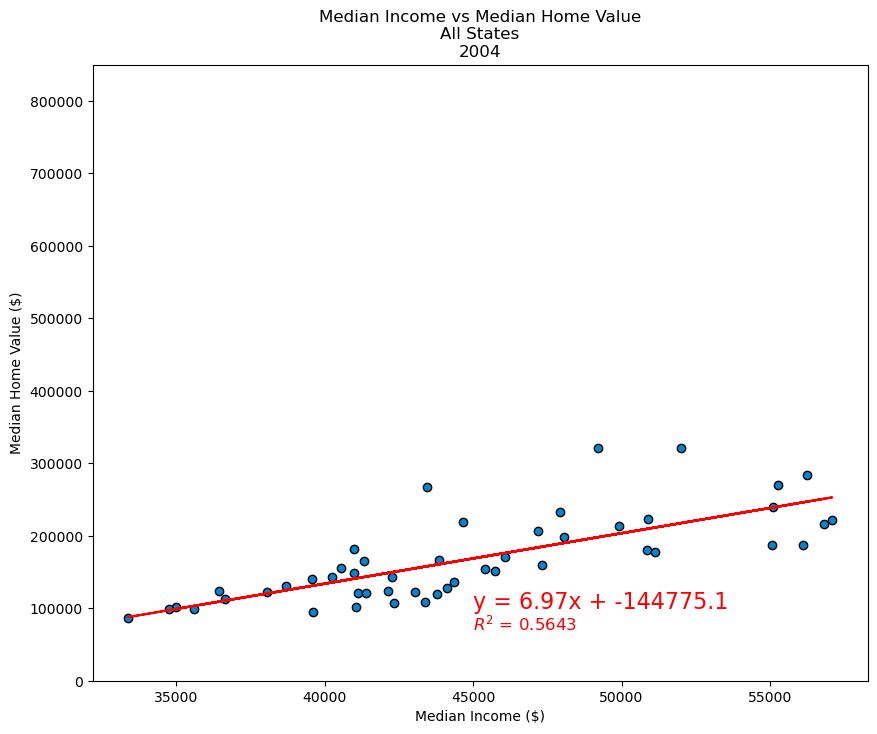

In [86]:
labels = [f"Median Income vs Median Home Value\nAll States\n{home_value_df.iloc[0,0]}",
          "Median Income ($)",
          "Median Home Value ($)"]

plt.figure(figsize=(10,8))

x_vals = median_income_df.iloc[0:1,start_column:end_column]
y_vals = home_value_df.iloc[0:1,start_column:end_column]

# Drop NA's
drop_list = y_vals.columns[y_vals.isna().any()]
x_vals = x_vals.drop(drop_list, axis=1)
y_vals = y_vals.drop(drop_list, axis=1)

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (45000,100000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (45000, 70000), color='r', size=12)

plt.ylim(0, 850000)
#plt.savefig("Images/LinearRegression_Home_Values_Income_2004.png")
figure_count = save_figure(figure_count, "Images","LinearRegression_Home_Values_Income_2004.png")
plt.show();

Saving to: Images/d09_LinearRegression_Home_Values_Income_2023.png


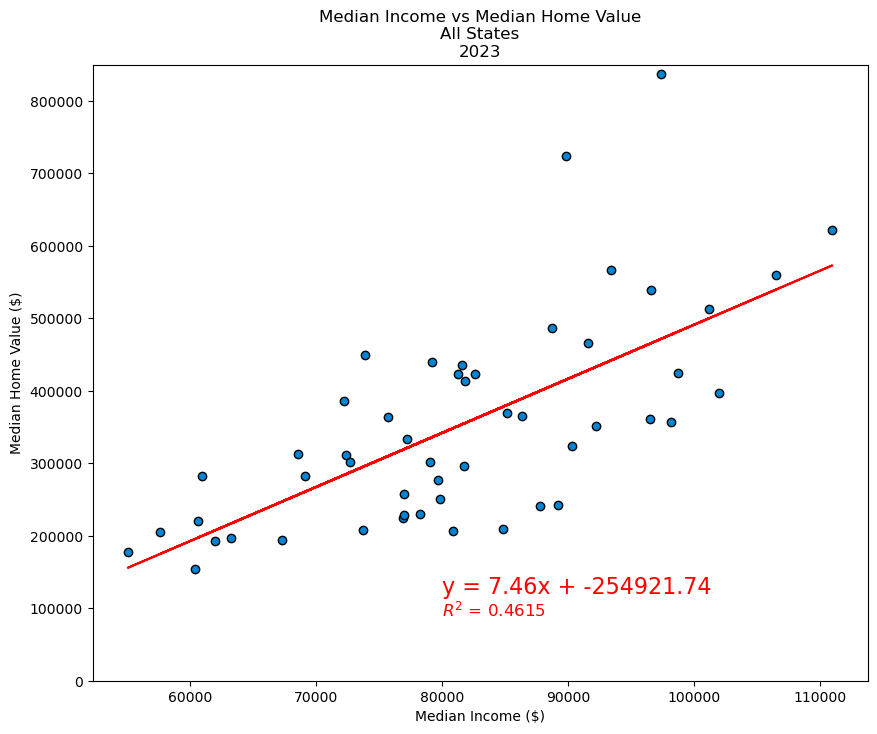

In [87]:
labels = [f"Median Income vs Median Home Value\nAll States\n{home_value_df.iloc[-1,0]}",
          "Median Income ($)",
          "Median Home Value ($)"]

plt.figure(figsize=(10,8))
x_vals = median_income_df.iloc[-1:,start_column:end_column]
y_vals = home_value_df.iloc[-1:,start_column:end_column]

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (80000,120000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (80000, 90000), color='r', size=12)

plt.ylim(0, 850000)
#plt.savefig("Images/LinearRegression_Home_Values_Income_2023.png")
figure_count = save_figure(figure_count, "Images","LinearRegression_Home_Values_Income_2023.png")
plt.show();

In [88]:
# Calculate home value : income ratios 2004

home_value_income_ratio_2004 = pd.DataFrame()
home_value_income_ratio_2004.index = inc_column_pair[3:53][1]
home_value_income_ratio_2004.index.name = "State"
home_value_income_ratio_2004['Median Income'] = median_income_df.iloc[0:1,start_column:end_column].squeeze()
home_value_income_ratio_2004['Median Home Value'] = round(home_value_df.iloc[0:1,start_column:end_column].squeeze(),0)
home_value_income_ratio_2004['Ratio'] = home_value_income_ratio_2004['Median Income'] / home_value_income_ratio_2004['Median Home Value']
home_value_income_ratio_2004 = states_df.merge(home_value_income_ratio_2004, on="State")

home_value_income_ratio_2004 = home_value_income_ratio_2004.rename({"District of Columbia": "D.C."})
ratio_top_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2004 = home_value_income_ratio_2004.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2004 = ratio_bottom_5_2004.sort_values("Ratio", ascending=False)

home_value_income_ratio_2004.head(60)

,Code,Lat,Lon,Median Income,Median Home Value,Ratio
State,,,,,,
Alabama,AL,32.806671,-86.791130,36630.0,112469.0,0.325690
Alaska,AK,61.370716,-152.404419,55060.0,187235.0,0.294069
Arizona,AZ,33.729759,-111.431221,43850.0,166982.0,0.262603
Arkansas,AR,34.969704,-92.373123,34980.0,101330.0,0.345209
California,CA,36.116203,-119.681564,49220.0,320966.0,0.153350
Colorado,CO,39.059811,-105.311104,50890.0,222892.0,0.228317
Connecticut,CT,41.597782,-72.755371,55100.0,240366.0,0.229234
Delaware,DE,39.318523,-75.507141,48050.0,197922.0,0.242772
D.C.,DC,38.897438,-77.026817,43450.0,267170.0,0.162631


In [89]:
ratios_2004 = ratio_top_5_2004.merge(ratio_bottom_5_2004, on=["State", "Median Income", "Median Home Value", "Ratio", "Code", "Lat", "Lon"], how="outer")
ratios_2004

,Code,Lat,Lon,Median Income,Median Home Value,Ratio
State,,,,,,
California,CA,36.116203,-119.681564,49220.0,320966.0,0.153350
D.C.,DC,38.897438,-77.026817,43450.0,267170.0,0.162631
Hawaii,HI,21.094318,-157.498337,56240.0,283888.0,0.198106
Indiana,IN,39.849426,-86.258278,42330.0,107289.0,0.394542
Iowa,IA,42.011539,-93.210526,43390.0,108409.0,0.400244
Kansas,KS,38.526600,-96.726486,41070.0,102302.0,0.401458
Massachusetts,MA,42.230171,-71.530106,52020.0,320550.0,0.162284
New York,NY,42.165726,-74.948051,44650.0,218936.0,0.203941
Oklahoma,OK,35.565342,-96.928917,39610.0,94917.0,0.417312


Saving to: Images/d10_Housing_Affordability_Top_Bottom_2004.png


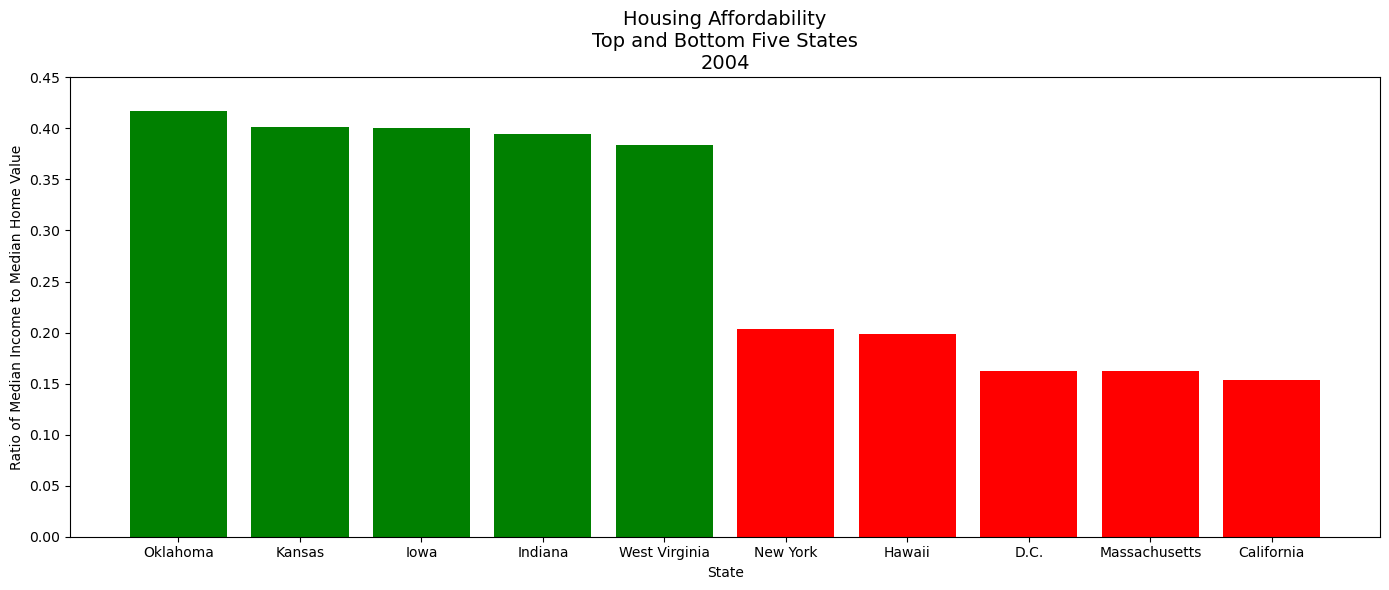

In [90]:
plt.figure(figsize=(14,6))
#plt.bar(ratios.index, ratios["Ratio"], color='green')
plt.bar(ratio_top_5_2004.index, ratio_top_5_2004['Ratio'], color='green')
plt.bar(ratio_bottom_5_2004.index, ratio_bottom_5_2004['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Housing Affordability\nTop and Bottom Five States\n{median_income_df.iloc[0:1,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Income to Median Home Value")
plt.tight_layout()
figure_count = save_figure(figure_count, "Images","Housing_Affordability_Top_Bottom_2004.png")
plt.show();

In [91]:
# Calculate home value : income ratios 2023

home_value_income_ratio_2023 = pd.DataFrame()
home_value_income_ratio_2023.index = inc_column_pair[3:53][1]
home_value_income_ratio_2023.index.name = "State"
home_value_income_ratio_2023['Median Income'] = median_income_df.iloc[-1:,start_column:end_column].squeeze()
home_value_income_ratio_2023['Median Home Value'] = round(home_value_df.iloc[-1:,start_column:end_column].squeeze(),0)
home_value_income_ratio_2023['Ratio'] = home_value_income_ratio_2023['Median Income'] / home_value_income_ratio_2023['Median Home Value']
home_value_income_ratio_2023 = states_df.merge(home_value_income_ratio_2023, on="State")

home_value_income_ratio_2023 = home_value_income_ratio_2023.rename({"District of Columbia": "D.C."})
ratio_top_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=False).iloc[0:5,:]
ratio_bottom_5_2023 = home_value_income_ratio_2023.sort_values('Ratio', ascending=True).iloc[0:5,:]
ratio_bottom_5_2023 = ratio_bottom_5_2023.sort_values("Ratio", ascending=False)

#home_value_income_ratio_2023.head(60)


In [92]:
ratios_2023 = ratio_top_5_2023.merge(ratio_bottom_5_2023, on=["State", "Median Income", "Median Home Value", "Ratio", "Code", "Lat", "Lon"], how="outer")
ratios_2023

,Code,Lat,Lon,Median Income,Median Home Value,Ratio
State,,,,,,
California,CA,36.116203,-119.681564,89870.0,723543.0,0.124208
D.C.,DC,38.897438,-77.026817,111000.0,622165.0,0.178409
Hawaii,HI,21.094318,-157.498337,97360.0,837184.0,0.116295
Idaho,ID,44.240459,-114.478828,73910.0,448862.0,0.164661
Illinois,IL,40.349457,-88.986137,87820.0,241308.0,0.363933
Iowa,IA,42.011539,-93.210526,80860.0,207009.0,0.390611
Kansas,KS,38.526600,-96.726486,84830.0,209389.0,0.405131
Nebraska,NE,41.125370,-98.268082,89190.0,242493.0,0.367804
Washington,WA,47.400902,-121.490494,93440.0,567051.0,0.164782


Saving to: Images/d11_Housing_Affordability_Top_Bottom_2023.png


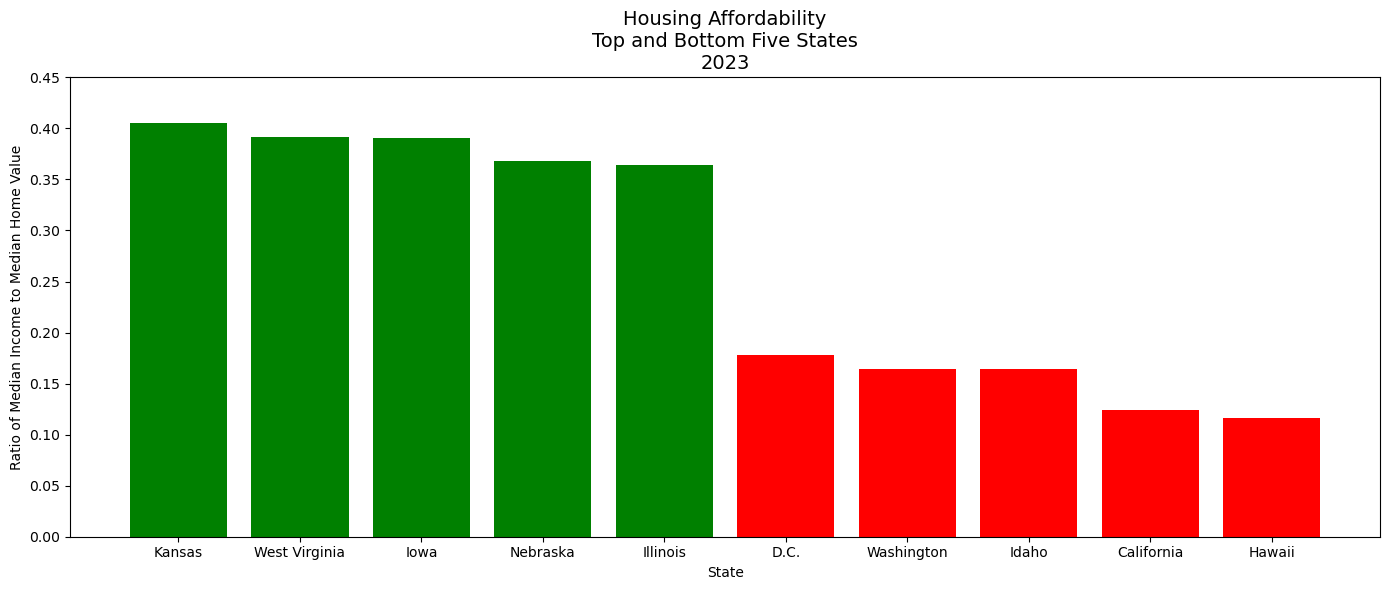

In [93]:
#plt.hist(ratios["Ratio"], label=ratios.index)
#ratios_2023 = ratios_2023.sort_values("Ratio", ascending=False)
#ratios_2023 = ratios_2023.rename({"District of Columbia": "D.C."})
#ratio_top_5_2023 = ratios_2023.sort_values("Ratio", ascending=False)
#ratio_top_5_2023 = ratios_2023.rename({"District of Columbia": "D.C."})

plt.figure(figsize=(14,6))
#plt.bar(ratios.index, ratios["Ratio"], color='green')
plt.bar(ratio_top_5_2023.index, ratio_top_5_2023['Ratio'], color='green')
plt.bar(ratio_bottom_5_2023.index, ratio_bottom_5_2023['Ratio'], color='red')
plt.ylim((0,0.45))
plt.title(f"Housing Affordability\nTop and Bottom Five States\n{median_income_df.iloc[-1:,0].iloc[0]}", size=14)
plt.xlabel("State")
plt.ylabel("Ratio of Median Income to Median Home Value")
plt.tight_layout()
figure_count = save_figure(figure_count, "Images","Housing_Affordability_Top_Bottom_2023.png")
plt.show();

In [94]:
map_info = home_value_income_ratio_2023.copy()

map_info['Median Home Value ($1000)'] = round(map_info['Median Home Value'] / 1000,0).astype('int')
map_info['Median Income ($1000)'] = round(map_info['Median Income'] / 1000,0).astype('int')

In [95]:
%%capture --no-display

bySize = "Median Home Value ($1000)"
byColor = "Median Income ($1000)"

# Configure the map plot
map_plot_1 = map_info.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = bySize,
    color = byColor,
    alpha = 0.65,
    frame_height = 600,
    frame_width = 800,
    title = f"All States & District of Columbia\nSize by {bySize}\nColor by {byColor}",
    hover_cols = ["State", "Median Home Value ($1000)", "Median Income ($1000)"]
)

# Save the map
#figure_count = save_figure(figure_count, "Images","Geomap_Home_Value_Income_2023.png")

# Display the map
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (Median Income ($1000),Median Home Value ($1000),State)